<a href="https://colab.research.google.com/github/JJungEEun/2023_DaconStudy/blob/main/KBO%20%ED%83%80%EC%9E%90%20OPS%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
!apt-get install fonts-nanum -qq  > /dev/null
!fc-cache -fv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [12]:
plt.rc("font", family='NanumBarunGothic')

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
cd /content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data

/content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data


In [5]:
regular = pd.read_csv("Regular_Season_Batter_pre(03-06).csv")
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [5]:
regular.head(3)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,year_born,position,career,starting_salary,OPS,외국인,weight,weight_category,age,age_category
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,1985,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,0,93,2,33,2
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,1992,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,1,72,0,19,0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1992,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,1,72,0,22,0


In [ ]:
train.head(3)

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,테임즈,15N1B,10.71,142,595,472,130,180,42,5,...,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,0.390029
1,심정수,03현RF,10.19,133,601,460,110,154,16,1,...,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,0.286932
2,이승엽,02삼1B,8.96,133,617,511,123,165,42,2,...,11,0,2,0.323,0.436,0.689,1.125,0.472,198.5,0.330532


In [6]:
correlations = train.corr()['OPS'].sort_values()

print("상관관계 상위 10개")
print(correlations.tail(10))
print("상관관계 하위 10개")
print(correlations.head(10))

상관관계 상위 10개
타점       0.685888
WAR      0.695759
루타       0.696696
BABIP    0.705809
타율       0.907511
출루       0.910560
장타       0.968124
WRC+     0.976067
wOBA     0.987187
OPS      1.000000
Name: OPS, dtype: float64
상관관계 하위 10개
희타    0.086423
도루    0.242796
3타    0.293599
도실    0.294842
고4    0.453372
사구    0.464151
희비    0.488923
병살    0.520856
G     0.560336
삼진    0.571952
Name: OPS, dtype: float64


Text(0.5, 1.0, 'Top 10 correlations with OPS')

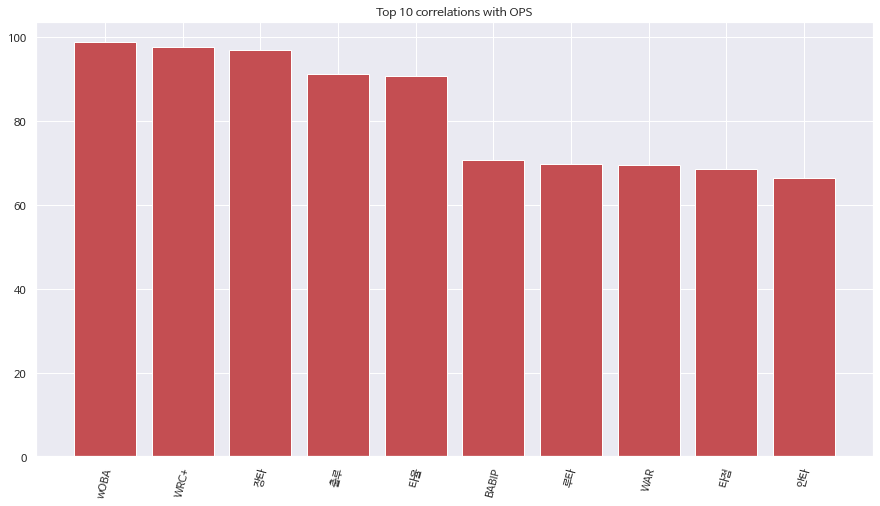

In [13]:
plt.figure(figsize=(15,8))

plt.bar(correlations.tail(11)[:-1].index.astype(str)[::-1], 100*correlations.tail(11)[:-1][::-1],color='r')
plt.xticks(rotation=75)
plt.title('Top 10 correlations with OPS')

Text(0.5, 1.0, 'Low 8 correlations with OPS')

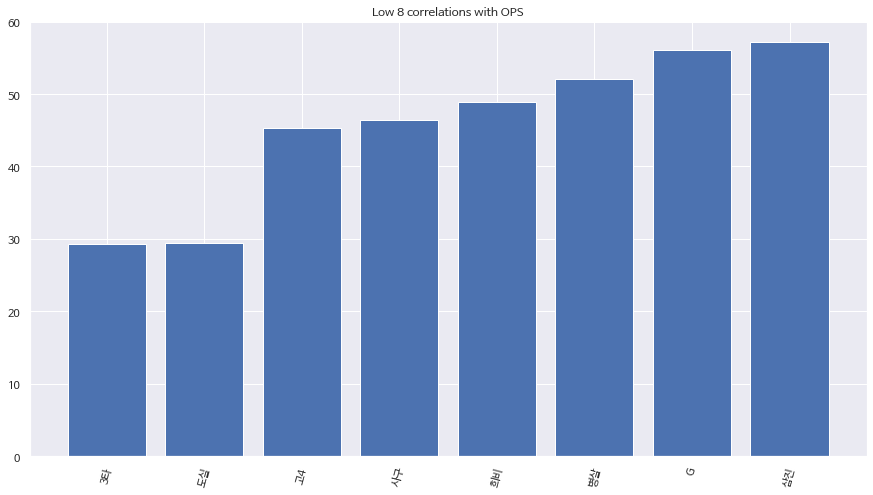

In [14]:
plt.figure(figsize=(15,8))

plt.bar(correlations.head(10)[2:].index.astype(str), 100*correlations.head(10)[2:])
plt.xticks(rotation=75)
plt.title('Low 8 correlations with OPS')

In [17]:
df = train[['이름', '팀', 'WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루',
       '장타', 'wOBA', 'WRC+', 'BABIP', "OPS"]]

# 분석에 필요없는 타자 이름과 팀 제거
df.drop(["이름", "팀"], axis=1, inplace=True)

In [18]:
df = df.fillna(df.mean())
# 결측치 평균값

In [22]:
# 모델 모듈
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [10]:
def data_split(data):

  X_train = data[(data['year']<2017)].drop(columns=['OPS'])
  X_test = data[(data['year']>=2017)].drop(columns=['OPS'])
  y_train = data[(data['year']<2017)]['OPS']
  y_test = data[(data['year']>=2017)]['OPS']
  y_test= y_test.reset_index(drop=True)

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = data_split(df)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### 선형회귀 분석


- 독립변수(X)는 독립적인 형태여야한다.
- 변수 간의 상관관계가 존재하면 결과는 왜곡될 수 있다
  - 따라서 상관관계가 있는 변수들은 제거해야함
  - 정규분포를 따른다는 가정이 전제되어 있어야함(정규성)


In [27]:
X = df.drop("OPS", axis=1)
y = df["OPS"] 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3507, 26), (877, 26), (3507,), (877,))

In [30]:
ss = StandardScaler()

In [31]:
scaled_train = ss.fit_transform(X_train)
scaled_test = ss.transform(X_test)

In [24]:
X = sm.add_constant(scaled_train)

In [32]:
model = sm.OLS(y, X)
model = model.fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    OPS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.542e+08
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        07:11:46   Log-Likelihood:                          27253.
No. Observations:                4384   AIC:                                 -5.446e+04
Df Residuals:                    4359   BIC:                                 -5.430e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WAR        -1.165e-05   1.61e-05     -0.722      0.470   -4.33e-05       2e-05
G          -2.921e-07   5.11e-07     -0.571      0.568   -1.29e-06     7.1e-07
타석          1.031e-05   6.01e-05      0.171      0.864      -0.000       0.000
타수         -1.116e-05   6.01e-05     -0.186      0.853      -0.000       0.000
득점         -2.032e-06   1.34e-06     -1.520      0.129   -4.65e-06    5.88e-07
안타          1.733e-06   1.98e-06      0.877      0.381   -2.14e-06    5.61e-06
2타         -1.033e-06    2.4e-06     -0.431      0.667   -5.74e-06    3.67e-06
3타           8.51e-06   5.09e-06      1.671      0.095   -1.47e-06    1.85e-05
홈런         -5.532e-06   2.67e-06     -2.073      0.038   -1.08e-05      -3e-07
루타          1.123e-06    1.4e-06      0.800      0.424   -1.63e-06    3.87e-06
타점          3.492e-06    1.4e-06      2.494      0.013    7.47e-07    6.24e-06
도루          1.925e-06   1.86e-06      1.035      0.301   -1.72e-06    5.57e-06
도실         -8.779e-06   4.59e-06     -1.912      0.056   -1.78e-05    2.21e-07
볼넷         -1.052e-05   6.02e-05     -0.175      0.861      -0.000       0.000
사구         -6.814e-06   6.02e-05     -0.113      0.910      -0.000       0.000
고4         -5.396e-08   6.29e-06     -0.009      0.993   -1.24e-05    1.23e-05
삼진          9.961e-07    7.4e-07      1.347      0.178   -4.54e-07    2.45e-06
병살          -1.82e-06   3.02e-06     -0.602      0.547   -7.74e-06     4.1e-06
희타         -8.455e-06   6.01e-05     -0.141      0.888      -0.000       0.000
희비         -2.473e-05   6.01e-05     -0.411      0.681      -0.000    9.31e-05
타율             0.0004      0.001      0.696      0.487      -0.001       0.001
출루             0.9990      0.001   1179.220      0.000       0.997       1.001
장타             0.9993      0.000   2288.084      0.000       0.998       1.000
wOBA           0.0019      0.001      1.551      0.121      -0.000       0.004
WRC+       -2.072e-07   3.19e-07     -0.649      0.517   -8.33e-07    4.19e-07
BABIP         -0.0003      0.000     -1.252      0.211      -0.001       0.000
==============================================================================
Omnibus:                      114.597   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.829
Skew:                          -0.008   Prob(JB):                     4.68e-61
Kurtosis:                       4.233   Cond. No.                     1.19e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenva

- R-squared: 모형 적합도
- F-statistic: 회귀모형에 대한 (통계적) 유의미성 검증결과

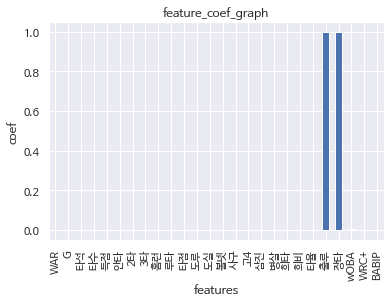

In [34]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

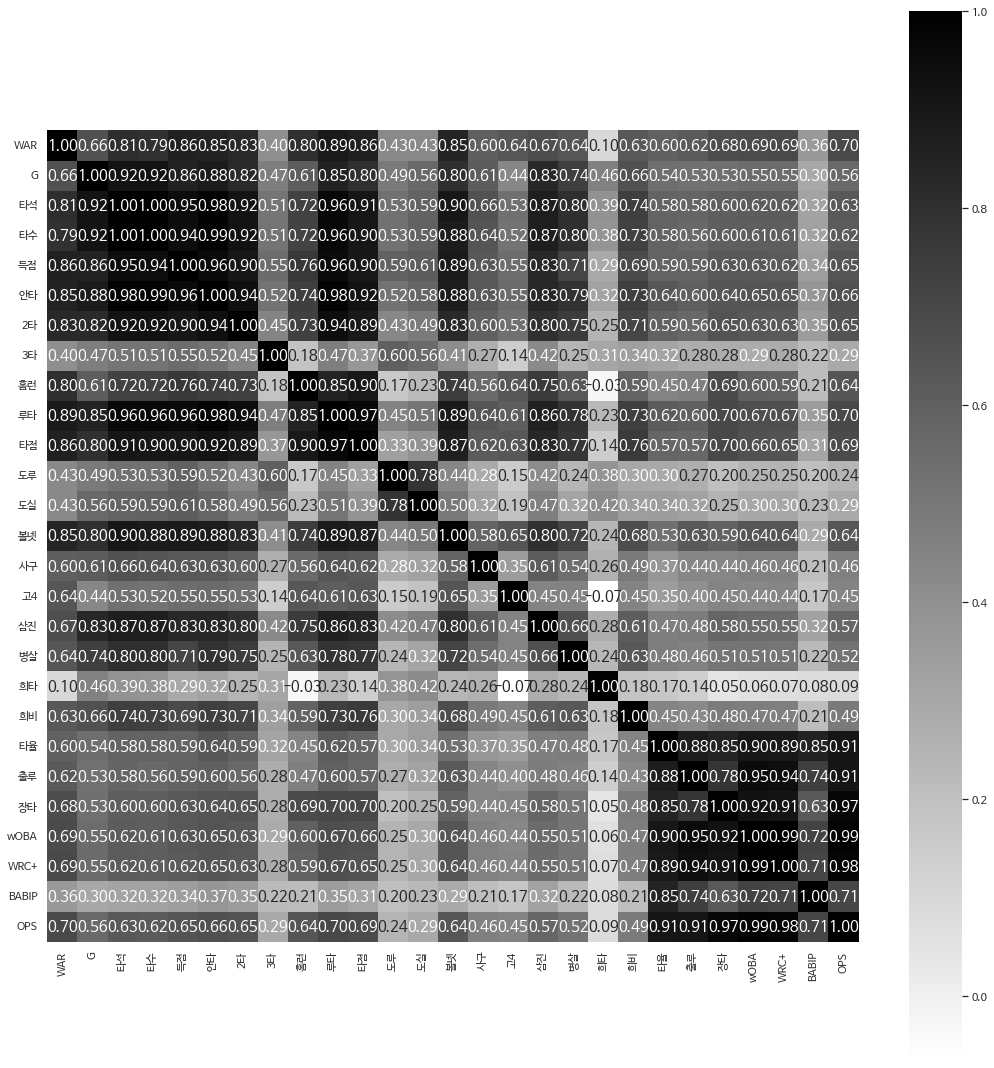

In [35]:
# 피처들의 상관관계 시각화
plt.figure(figsize=(15, 15))
corr = df.corr()
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size" : 15},
                 yticklabels = df.columns, xticklabels = df.columns, cmap="gray_r")

plt.tight_layout()
plt.show()

In [19]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns
vif.round(1)

,VIF_Factor,feature
0,18.7,WAR
1,35.4,G
2,5981007.2,타석
3,4530185.7,타수
4,52.8,득점
5,inf,안타
6,inf,2타
7,inf,3타
8,inf,홈런
9,inf,루타


### modeling

In [36]:
rf = RandomForestRegressor()

In [37]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
rf.score(X_test, y_test)

0.9976136018276539

In [39]:
pred = rf.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

0.009026254439867449

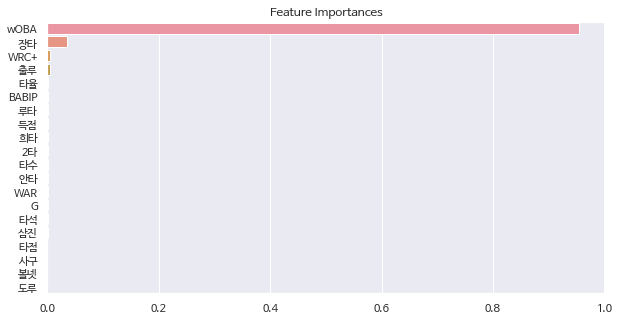

In [40]:
# 특성중요도 확인
fea_importance = rf.feature_importances_
fea_importances = pd.Series(fea_importance, index = X_train.columns)
fea_20 = fea_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
sns.barplot(x=fea_20, y=fea_20.index)
plt.show()

- 랜덤 포레스트, 트리 계열 알고리즘의 특징인 특성 중요도로 변수 선택을 하였다.
- 특성 중요도, 즉 컬럼에 영향을 미치는 영향이 큰 wOBA, WRC+, 장타 위의 3가지 변수가 가장 종속변수인 OPS에 큰 영향을 미쳤고 이에 따라 위의 3가지 변수만 선택하여 모델링을 진행

#### feature_importance를 바탕으로 변수 선택

In [80]:
X = df[["wOBA", "WRC+", "장타"]]
y = df["OPS"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3507, 3), (877, 3), (3507,), (877,))

In [83]:
np.random.seed(29)

In [84]:
preprocess = FeatureUnion([("std", StandardScaler())])

In [85]:
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", RandomForestRegressor())])

In [86]:
search_space = [{"classifier" : [LinearRegression()]},
                {"classifier" : [Ridge()]},
                {"classifier" : [Lasso()]},
                {"classifier" : [ElasticNet()]},
                {"classifier" : [ARDRegression()]},
                {"classifier" : [BayesianRidge()]},
                {"classifier" : [RandomForestRegressor()],
                 "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features" : [1, 2, 3],
                 "classifier__min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]},
                 {"classifier" : [SVR()],
                  "classifier__kernel" : ["rbf", "poly"],
                  "classifier__C" : np.arange(0, 1, 0.1)}]

In [87]:
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [88]:
best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 71 candidates, totalling 355 fits
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Lasso(); total time=   0.0s
[CV] END .................................class

In [89]:
best_model.best_estimator_

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler())])),
                ('classifier', BayesianRidge())])

In [90]:
grid_pred = best_model.predict(X_test)

In [91]:
# 랜덤포레스트 베이스 모델
np.sqrt(mean_squared_error(y_test, pred))

0.008945510432530822

In [92]:
# 그리드 서치를 통한 모델
np.sqrt(mean_squared_error(y_test, grid_pred))

0.01168899384266867

- 랜덤 포레스트 베이스 모델을 사용하여 선택한 것 보다 더 좋은 결과를 확인 할 수 있다.


#### 모든 변수 사용

In [45]:
X = df.drop("OPS", axis=1)
y = df["OPS"] 

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [47]:
preprocess_all = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])

In [48]:
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", RandomForestRegressor())])

In [49]:
search_space = [{"classifier" : [LinearRegression()]},
                {"classifier" : [Ridge()]},
                {"classifier" : [Lasso()]},
                {"classifier" : [ElasticNet()]},
                {"classifier" : [ARDRegression()]},
                {"classifier" : [BayesianRidge()]},
                {"classifier" : [RandomForestRegressor()],
                 "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features" : [1, 2, 3],
                 "classifier__min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]},
                 {"classifier" : [SVR()],
                  "classifier__kernel" : ["rbf", "poly"],
                  "classifier__C" : np.arange(0, 1, 0.1)}]

In [50]:
gridsearch_all = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [51]:
best_model_all = gridsearch_all.fit(X_train, y_train)

Fitting 5 folds for each of 71 candidates, totalling 355 fits
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.1s
[CV] END ......................classifier=LinearRegression(); total time=   0.1s
[CV] END ......................classifier=LinearRegression(); total time=   0.1s
[CV] END ......................classifier=LinearRegression(); total time=   0.1s
[CV] END .................................classifier=Ridge(); total time=   0.1s
[CV] END .................................classifier=Ridge(); total time=   0.1s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.1s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Lasso(); total time=   0.1s
[CV] END .................................class

In [52]:
best_model_all.best_estimator_

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler())])),
                ('classifier', ARDRegression())])

In [53]:
pred_all = best_model_all.predict(X_test)

In [93]:
print(f"base model rmse : {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"랜덤포레스트 feature_importances를 활용한 후 rmse : {np.sqrt(mean_squared_error(y_test, grid_pred))}")
print(f"모든 데이터를 활용하여 전처리 후 rmse : {np.sqrt(mean_squared_error(y_test, pred_all))}")

base model rmse : 0.008945510432530822
랜덤포레스트 feature_importances를 활용한 후 rmse : 0.01168899384266867
모든 데이터를 활용하여 전처리 후 rmse : 0.0005136734139200341


- 결과: 랜덤포레스트 feature_importances를 활용 + standardscaler + ARDRegression

#### validation dataset

In [71]:
test.head(3)

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,이정후,22키CF,9.23,142,627,553,85,193,36,10,...,10,0,3,0.349,0.421,0.575,0.996,0.441,182.5,0.339321
1,피렐라,22삼LF,7.40,141,630,561,102,192,33,4,...,19,0,2,0.342,0.411,0.565,0.976,0.434,169.3,0.361233
2,나성범,22KRF,6.50,144,649,563,92,180,39,2,...,7,0,5,0.320,0.402,0.508,0.910,0.411,157.4,0.387805


In [97]:
X = test.drop(["OPS","팀","이름"], axis=1)
y = test["OPS"] 

In [98]:
pred_all = best_model_all.predict(X)

In [100]:
np.sqrt(mean_squared_error(y, pred_all))

0.00045397233593889044